In [ ]:
# Brain Tumor Classification using ResNet50
# 1. Imports and Setup

import numpy as np
import h5py
import cv2
import os
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 16
num_classes = 3  # For meningioma, glioma, pituitary tumors
class_names = ["Meningioma", "Glioma", "Pituitary"]

In [ ]:
# 2. Load Functions

# Load data from a .mat file
def load_data_from_mat(mat_file):
    """Load data from MATLAB v7.3 .mat file and return image and label."""
    with h5py.File(mat_file, 'r') as data:
        label = int(data['cjdata']['label'][0][0] - 1)  # Adjust labels to 0-index
        image = np.array(data['cjdata']['image'])        # Convert image to NumPy array
        image_resized = cv2.resize(image, (img_height, img_width))  # Resize image
    return image_resized, label

# Define ResNet-50-based model with additional CNN layers
def create_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    for layer in base_model.layers:
        layer.trainable = False
    
    x = base_model.output
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# 3. Load and Preprocess Dataset

# Load all images and labels from directory
path_to_mat_files = 'data/'	  # Update this path
images = []
labels = []

for mat_file in os.listdir(path_to_mat_files):
    if mat_file.endswith('.mat'):
        result = load_data_from_mat(os.path.join(path_to_mat_files, mat_file))
        if result:
            img, lbl = result
            images.append(img)
            labels.append(lbl)

# Convert lists to numpy arrays
images = np.array(images)
images = np.expand_dims(images, axis=-1)  # Expand dimension for grayscale images
images = np.repeat(images, 3, axis=-1)    # Convert grayscale to 3 channels for ResNet-50
labels = np.array(labels)

# Normalize images and one-hot encode labels
images = images / 255.0  # Rescale images to [0, 1]
labels = tf.keras.utils.to_categorical(labels, num_classes)

# Load cross-validation indices from cvind.mat file
cvind_path = 'data/cvind.mat'	  # Update with actual path to cvind.mat
with h5py.File(cvind_path, 'r') as file:
    cvind_indices = np.array(file['cvind']).flatten()

C:\Users\tarun\AppData\Local\Temp\ipykernel_15536\1847318681.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  image = np.array(data['cjdata']['image'])        # Convert image to NumPy array
C:\Users\tarun\AppData\Local\Temp\ipykernel_15536\2793600782.py:27: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  cvind_indices = np.array(file['cvind']).flatten()


Starting fold 1
Epoch 1/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.4598 - loss: 1.2262 - val_accuracy: 0.7103 - val_loss: 0.6399
Epoch 2/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.6287 - loss: 0.8553 - val_accuracy: 0.7823 - val_loss: 0.4909
Epoch 3/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.6706 - loss: 0.7487 - val_accuracy: 0.8432 - val_loss: 0.3748
Epoch 4/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.7419 - loss: 0.6666 - val_accuracy: 0.8653 - val_loss: 0.3501
Epoch 5/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.7478 - loss: 0.6156 - val_accuracy: 0.8210 - val_loss: 0.3843
Epoch 6/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.7741 - loss: 0.5457 - val_accuracy: 0.8561 - val_loss: 0.3383
Epoch 7/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.7669 - loss: 0.5641 - val_accuracy: 0.8672 - val_loss: 0.3243
Epoch 8/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.7894 - loss: 0

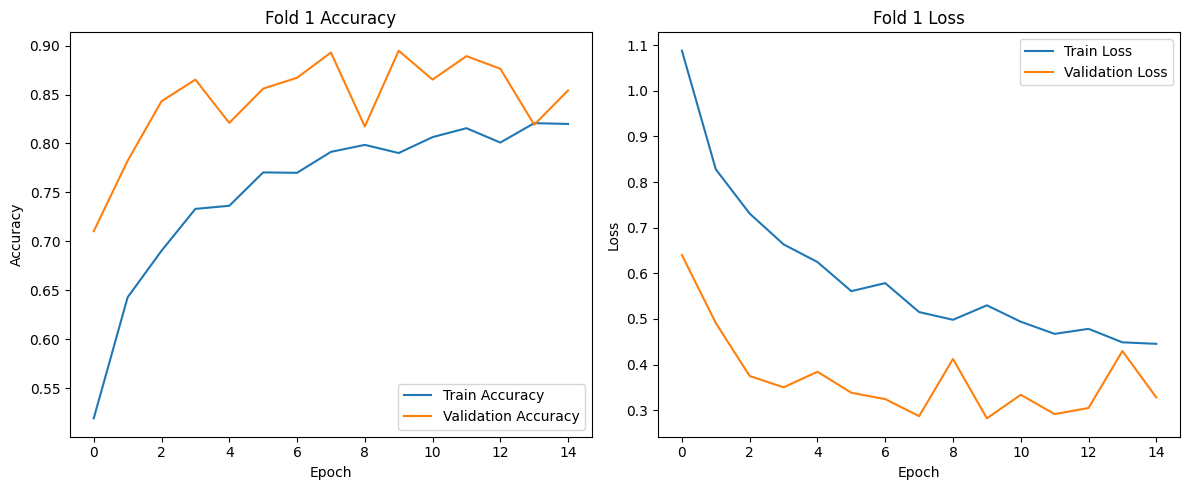

34/34 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8650 - loss: 0.3140
Fold 1 Validation Accuracy: 89.48%
Starting fold 2
Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.4776 - loss: 1.2326 - val_accuracy: 0.6613 - val_loss: 0.6888
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.6496 - loss: 0.8263 - val_accuracy: 0.6642 - val_loss: 0.6985
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.6691 - loss: 0.7635 - val_accuracy: 0.7776 - val_loss: 0.5443
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.7379 - loss: 0.6379 - val_accuracy: 0.8292 - val_loss: 0.4704
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.7647 - loss: 0.5973 - val_accuracy: 0.7511 - val_loss: 0.6143
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.7663 - loss: 0.5767 - val_accuracy: 0.8336 - val_loss: 0.4627
Epoch 7/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.7824 - loss: 0.5170 - val_accuracy:

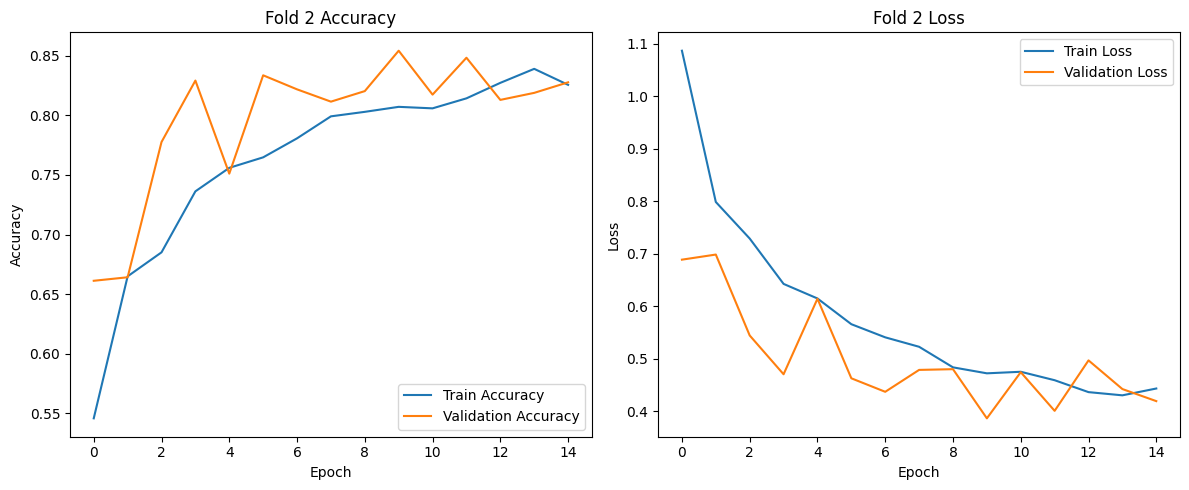

43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 932ms/step - accuracy: 0.8571 - loss: 0.4018
Fold 2 Validation Accuracy: 85.42%
Starting fold 3
Epoch 1/25
156/156 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step - accuracy: 0.4749 - loss: 1.1748 - val_accuracy: 0.7238 - val_loss: 0.6248
Epoch 2/25
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6263 - loss: 0.8599

KeyboardInterrupt: 

In [ ]:
# 4. 5-Fold Cross Validation Training

unique_folds = np.unique(cvind_indices).astype(int)
fold_results = {}

# Perform 5-fold cross-validation
for fold in unique_folds:
    print(f"Starting fold {fold}")
    
    # Split data into training and validation sets
    train_idx = np.where(cvind_indices != fold)[0]
    val_idx = np.where(cvind_indices == fold)[0]
    
    X_train, y_train = images[train_idx], labels[train_idx]
    X_val, y_val = images[val_idx], labels[val_idx]
    
    # Data augmentation
    train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                       shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
    train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
    validation_generator = ImageDataGenerator().flow(X_val, y_val, batch_size=batch_size)
    
    # Create model
    model = create_model()
    
    # Callbacks for early stopping and model checkpointing
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint = ModelCheckpoint(f'best_model_fold_{fold}.keras', monitor='val_accuracy', save_best_only=True)
    
    # Train the model
    history = model.fit(train_generator, validation_data=validation_generator, epochs=25,
                        callbacks=[early_stopping, checkpoint])
    
    # Plot training & validation accuracy and loss values for this fold
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    
    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(validation_generator)
    print(f"Fold {fold} Validation Accuracy: {val_acc * 100:.2f}%")
    fold_results[fold] = {'val_loss': val_loss, 'val_acc': val_acc}

In [ ]:
# 5. Function to classify a single .mat file

def classify_single_mat_file(model, mat_file):
    """Classify a single .mat file using the trained model."""
    image, _ = load_data_from_mat(mat_file)  # Load image from .mat
    image = np.expand_dims(image, axis=-1)   # Add channel dimension
    image = np.repeat(image, 3, axis=-1)     # Repeat to make it 3 channels
    image = np.expand_dims(image, axis=0)    # Add batch dimension
    image = image / 255.0                    # Normalize
    
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    print(f"Predicted Tumor Type: {class_names[predicted_class]} (Confidence: {prediction[0][predicted_class] * 100:.2f}%)")

# Ask user for a .mat file to classify
import ipywidgets as widgets
from IPython.display import display

# Select a model file and .mat file
def select_and_classify():
    model_path = widgets.Text(value='best_model_fold_1.keras', description='Model Path:')
    mat_file_path = widgets.Text(value='path_to_single_mat_file.mat', description='MAT File Path:')
    
    def on_button_click(b):
        model = tf.keras.models.load_model(model_path.value)
        classify_single_mat_file(model, mat_file_path.value)
    
    button = widgets.Button(description="Classify")
    button.on_click(on_button_click)
    
    display(model_path, mat_file_path, button)

select_and_classify()